In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
city_density = pd.read_csv("uscitypopdensity.csv")
walmart_data = pd.read_excel("walmart Retail Data.xlsx", sheet_name="walmart Retail Data")

In [3]:
city_density = city_density.drop(columns=['Index'], errors='ignore')
city_density.columns = ['City', 'State', 'Population_Density', 'Population_2016', 'Land_Area']
city_density = city_density.dropna()
city_density = city_density[
    (city_density['Population_2016'] > 0) & (city_density['Land_Area'] > 0)
]
walmart_cleaned = walmart_data.dropna(subset=['Order Date', 'Product Category', 'Sales'])

In [4]:
print(walmart_data.columns.tolist())

['City', 'Customer Age', 'Customer Name', 'Customer Segment', 'Discount', 'Number of Records', 'Order Date', 'Order ID', 'Order Priority', 'Order Quantity', 'Product Base Margin', 'Product Category', 'Product Container', 'Product Name', 'Product Sub-Category', 'Profit', 'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost', 'State', 'Unit Price', 'Zip Code']


In [5]:
# Strip column names (important)
walmart_data.columns = walmart_data.columns.str.strip()

# Keep only rows that have the necessary fields
walmart_cleaned = walmart_data.dropna(subset=['Order Date', 'Product Category', 'Sales'])
city_order_counts = walmart_data['City'].value_counts().reset_index()
city_order_counts.columns = ['City', 'Order_Count']

In [6]:
city_mfc_df = pd.merge(city_density, city_order_counts, on='City', how='inner')

In [7]:
features = city_mfc_df[['Population_Density', 'Population_2016', 'Order_Count']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
city_mfc_df['Cluster'] = kmeans.fit_predict(scaled_features)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


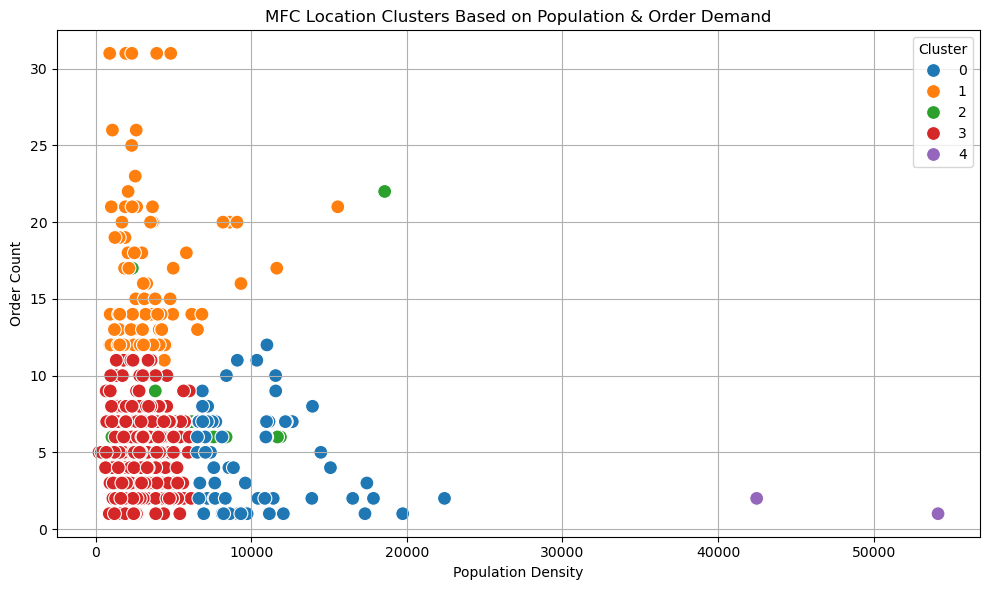

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=city_mfc_df,
    x='Population_Density',
    y='Order_Count',
    hue='Cluster',
    palette='tab10',
    s=100
)
plt.title('MFC Location Clusters Based on Population & Order Demand')
plt.xlabel('Population Density')
plt.ylabel('Order Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
print(city_mfc_df[['City', 'State', 'Population_Density', 'Order_Count', 'Cluster']].head(10))

           City          State  Population_Density  Order_Count  Cluster
0       Chicago       Illinois               11883            6        2
1       Houston          Texas                3842            9        2
2       Phoenix        Arizona                3126            6        2
3  Philadelphia   Pennsylvania               11692            6        2
4   San Antonio          Texas                3238            6        2
5     San Diego     California                4326            6        2
6        Dallas          Texas                3870            6        2
7      San Jose     California                5808            6        2
8        Austin          Texas                3182            6        2
9  Jacksonville        Florida                1179           12        2


In [11]:
print(city_mfc_df.loc[city_mfc_df[['Order_Count','Population_Density']].idxmax()])

           City        State  Population_Density  Population_2016  Land_Area  \
11     Columbus         Ohio                3960           860090        217   
422  Union City   New Jersey               54138            69296          1   

     Order_Count  Cluster  
11            31        1  
422            1        4  


In [12]:
from sklearn.metrics.pairwise import euclidean_distances

In [13]:
scaled_features = scaler.transform(features)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10).fit(scaled_features)
city_mfc_df['Cluster'] = kmeans.predict(scaled_features)
cluster_centers = kmeans.cluster_centers_

distances = euclidean_distances(scaled_features, cluster_centers)
city_mfc_df['Assigned_MFC'] = distances.argmin(axis=1)

print(city_mfc_df[['City', 'State', 'Order_Count', 'Assigned_MFC']].head(10))

           City          State  Order_Count  Assigned_MFC
0       Chicago       Illinois            6             2
1       Houston          Texas            9             2
2       Phoenix        Arizona            6             2
3  Philadelphia   Pennsylvania            6             2
4   San Antonio          Texas            6             2
5     San Diego     California            6             2
6        Dallas          Texas            6             2
7      San Jose     California            6             2
8        Austin          Texas            6             2
9  Jacksonville        Florida           12             2


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [14]:
import networkx as nx

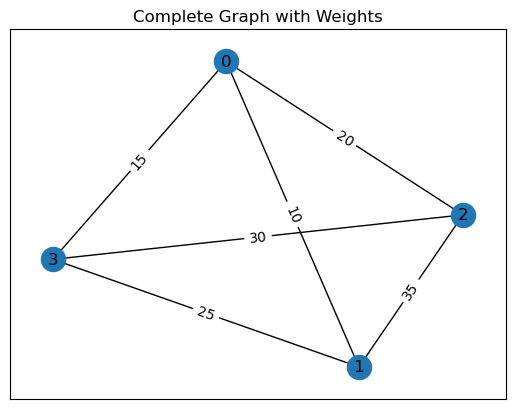

Route: [0, 2, 3, 1, 0]


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create complete graph with 4 nodes
G = nx.complete_graph(4)

# Set weights on edges
nx.set_edge_attributes(G, {
    (0, 1): 10, (0, 2): 20, (0, 3): 15,
    (1, 2): 35, (1, 3): 25,
    (2, 3): 30
}, "weight")

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Complete Graph with Weights")
plt.show()

# Solve TSP
path = nx.approximation.traveling_salesman_problem(G, weight="weight")
print("Route:", path)


Optimal route (approx):
New York
Los Angeles
Phoenix
Houston
Chicago
New York

Total distance: 5863 miles


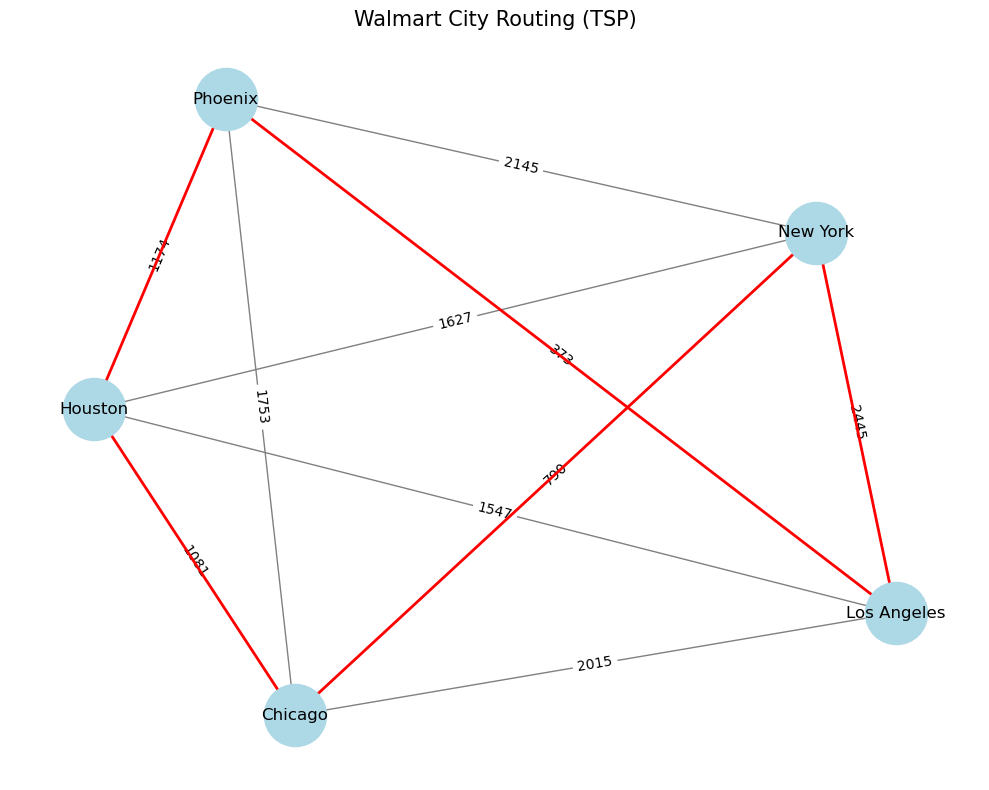

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Define cities and distances (mock data)
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
distances = {
    ('New York', 'Los Angeles'): 2445,
    ('New York', 'Chicago'): 790,
    ('New York', 'Houston'): 1627,
    ('New York', 'Phoenix'): 2145,
    ('Los Angeles', 'Chicago'): 2015,
    ('Los Angeles', 'Houston'): 1547,
    ('Los Angeles', 'Phoenix'): 373,
    ('Chicago', 'Houston'): 1081,
    ('Chicago', 'Phoenix'): 1753,
    ('Houston', 'Phoenix'): 1174
}

# Step 1: Create graph
G = nx.Graph()

# Step 2: Add weighted edges
for (city1, city2), distance in distances.items():
    G.add_edge(city1, city2, weight=distance)

# Step 3: Solve TSP using approximation
from networkx.algorithms.approximation import traveling_salesman_problem
tsp_path = traveling_salesman_problem(G, weight='weight')

# Step 4: Print result
print("Optimal route (approx):")
for city in tsp_path:
    print(city)

# Optional: Show total distance
total_distance = sum(G[tsp_path[i]][tsp_path[i+1]]['weight'] for i in range(len(tsp_path)-1))
print(f"\nTotal distance: {total_distance} miles")

# Step 5: Visualize graph
pos = nx.spring_layout(G, seed=42)

fig, ax = plt.subplots(figsize=(10, 8))  # ✅ Proper figure and axis

nx.draw(
    G, pos, ax=ax, with_labels=True, 
    node_color='lightblue', node_size=2000, edge_color='gray'
)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)

# Highlight TSP path
tsp_edges = list(zip(tsp_path[:-1], tsp_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=tsp_edges, edge_color='red', width=2, ax=ax)

plt.title("Walmart City Routing (TSP)", fontsize=15)
plt.tight_layout()
plt.show()


In [17]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [18]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# 1. Clean column names
walmart_data.columns = walmart_data.columns.str.strip()

# 2. Drop only necessary missing values
walmart_cleaned = walmart_data.dropna(subset=['Order Date', 'Product Category', 'Sales'])

# 3. Confirm valid categories
print("Available categories:", walmart_cleaned['Product Category'].unique())

# 4. Choose a valid category from the list above
category = 'Office Supplies'  # or 'Furniture' or 'Technology'

# 5. Filter for category
cat_data = walmart_cleaned[walmart_cleaned['Product Category'] == category]

# 6. Prepare data for Prophet
cat_data['Order Date'] = pd.to_datetime(cat_data['Order Date'])  # convert date
daily_sales = cat_data.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']
daily_sales = daily_sales[daily_sales['y'] > 0]

# Check if data is sufficient
print(daily_sales.head())
print(f"Data points for Prophet: {len(daily_sales)}")

# 7. Train Prophet model
model = Prophet()
model.fit(daily_sales)

# 8. Make future predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# 9. Plot forecast
fig = model.plot(forecast)
plt.title(f"30-Day Sales Forecast for {category}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# 10. Optional: View components (trend, seasonality)
model.plot_components(forecast)
plt.show()


Available categories: ['Office Supplies' 'Furniture' 'Technology']
          ds        y
0 2012-01-01  1052.84
1 2012-01-02  5779.62
2 2012-01-03   504.06
3 2012-01-04   214.69
4 2012-01-05  1171.57
Data points for Prophet: 1334


C:\Users\reply\AppData\Local\Temp\ipykernel_24012\3132847025.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Order Date'] = pd.to_datetime(cat_data['Order Date'])  # convert date
11:21:43 - cmdstanpy - INFO - Chain [1] start processing
11:21:43 - cmdstanpy - INFO - Chain [1] done processing
11:21:43 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
11:21:43 - cmdstanpy - INFO - Chain [1] start processing
11:21:43 - cmdstanpy - INFO - Chain [1] done processing
11:21:43 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\reply\AppData\Roaming\Python\Python312\site-packages\prophet\stan_model\prophet_model.bin random seed=96009 data file=C:\Users\reply\AppData\Local\Temp\tmp8qyirb1p\up2jwvmv.json init=C:\Users\reply\AppData\Local\Temp\tmp8qyirb1p\lqvc8y6z.json output file=C:\Users\reply\AppData\Local\Temp\tmp8qyirb1p\prophet_modeljsxarsb5\prophet_model-20250627112143.csv method=optimize algorithm=newton iter=10000' failed: 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Clean column names (good habit)
walmart_data.columns = walmart_data.columns.str.strip()

# Drop rows with missing data
walmart_cleaned = walmart_data.dropna(subset=['Order Date', 'Product Category', 'Sales'])

# Convert 'Order Date' to datetime
walmart_cleaned['Order Date'] = pd.to_datetime(walmart_cleaned['Order Date'])

# Choose a product category
category = 'Health and Personal Care'
cat_data = walmart_cleaned[walmart_cleaned['Product Category'] == category]

# Group sales by day
daily_sales = cat_data.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

# Drop missing or zero sales
daily_sales = daily_sales.dropna()
daily_sales = daily_sales[daily_sales['y'] > 0]

# Sanity check
print(daily_sales.head())
print("Data points for Prophet:", len(daily_sales))

# Build and train model
model = Prophet()
model.fit(daily_sales)

# Make future dataframe and forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title(f"30-Day Sales Forecast for {category}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


Empty DataFrame
Columns: [ds, y]
Index: []
Data points for Prophet: 0


ValueError: Dataframe has less than 2 non-NaN rows.

In [20]:
category = 'Health and Personal Care'
print(walmart_cleaned['Product Category'].unique())
print(walmart_cleaned[walmart_cleaned['Product Category'] == category].shape)


['Office Supplies' 'Furniture' 'Technology']
(0, 25)
